In [1]:
import numpy as np
csv_path = "mtfuji_data.csv" # ファイル名（パス）を指定する

np.set_printoptions(suppress=True) # 指数表示の禁止を設定する

#左から順番に「その地点の番号」「緯度」「経度」「標高」「地点0からの距離」となっています。
#標高と距離の単位はメートルです。300地点のデータです。
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

print(fuji[130:150])

[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]
 [  140.          35.369253   138.727674  3567.76     45110.      ]
 [  141.          35.370928   138.724777  3348.43     45432.      ]
 [  142.          35.372602   138.72188   3171.53     45754.      ]
 [  143.          35.374277   138.718982  3019.8      46077.      ]
 [  144.          35.375951   138.716085  2864.5

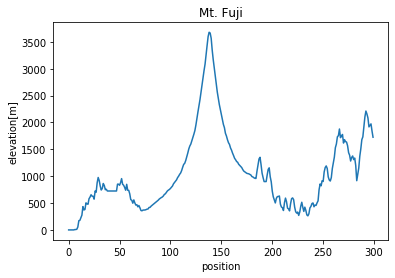

In [3]:
"""
【問題1】データの可視化
Matplotlibを使い標高データを可視化してください。
横軸に「その地点の番号」、縦軸に「標高」を設定すれば、富士山の断面図が描けます。
"""
import matplotlib.pyplot as plt

plt.title("Mt. Fuji")
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.plot(fuji[:,0], fuji[:,3])
plt.show()




In [11]:
"""
【問題2】ある地点の勾配を計算する関数を作成
「二次元配列と勾配問題」では各地点での勾配を最初に求めました。
しかし、暗闇の富士山を想像すると、知ることができるのは今いる地点の勾配だけです。
「今いる地点の番号」と「今いる隣の地点の番号（今いる地点の番号-1）」の関係による勾配を求める関数を作成してください。
勾配は以下の式で求まりましたが、このデータでは「標高」がy、「その地点の番号」がxに相当します。
"""

def place_right_now (number_of_place = 135):
    gradient = (fuji[number_of_place,3]-fuji[number_of_place-1,3])/(fuji[number_of_place,0]-fuji[number_of_place-1,0])
    return gradient, number_of_place
    
gradient, number_of_place = place_right_now(136)
print("{}番地点の勾配：{}".format(number_of_place, gradient))



136番地点の勾配：168.35000000000036
[135 136 137]番地点の勾配：[178.43 168.35 165.49]


In [12]:
number_of_places = np.array([135, 136, 137])
gradients, number_of_places = place_right_now(number_of_places)
print("{}番地点の勾配：{}".format(number_of_places, gradients))

[135 136 137]番地点の勾配：[178.43 168.35 165.49]


In [92]:
"""
【問題3】移動先の地点を計算する関数を作成
今いる地点の勾配の情報を元に、次に移動先の地点を計算する関数を作成してください。
数式で表すと 「移動先の地点 = 今いる地点 - $\alpha$ ×今いる地点の勾配」 となります。
「今いる地点の勾配」は問題2で作成した関数の戻り値を使用してください。
$\alpha$ は0より大きい任意の値をとるハイパーパラメータです。機械学習の分野では学習率という名前で呼ばれます。
この値によって下り方が変わります。ここでは例えば0.2に設定してください。
"""

def next_place_from_here (place_right_now, number_of_place=135, alpha=0.2):
    gradient, number_of_place = place_right_now(number_of_place)
    next_place = fuji[number_of_place,0] - alpha * gradient
    next_place = np.maximum(1, next_place) # 範囲より小さい値を範囲内に収める（1未満を1にする）
    next_place = np.minimum(len(fuji[:, 3])-1, next_place) # 範囲より小さい値を範囲内に収める（1未満を1にする）
    next_place = round(next_place)
    next_place = int(next_place)
    return next_place

next_place = next_place_from_here(place_right_now,136,alpha=0.1)
print("{}番地点の次に移動する地点：{}".format(number_of_place, next_place))

136番地点の次に移動する地点：119


In [93]:
"""
【問題4】山を下る関数を作成してください。
最初の地点を受け取り、問題3の関数によって地点を更新していきます。
移動毎の地点はリストなどに記録して、これを関数の戻り値としてください。
最初の「今いる地点」は富士山の頂上付近、136番の地点（標高3434.59[m]）とします。
ここから山を下っていきましょう。"""


def going_down (next_place_from_here, place_right_now, number_of_place=136, alpha=0.2):
    step_for_going_down = []
    step_for_going_down.append(number_of_place)
    while step_for_going_down[-1] not in step_for_going_down[:-1]:
        gradient, number_of_place = place_right_now(number_of_place)
        next_place = next_place_from_here(place_right_now,number_of_place,alpha=alpha)
        step_for_going_down.append(next_place)
        number_of_place = next_place

    return step_for_going_down

step_for_going_down = going_down(next_place_from_here, place_right_now, number_of_place=136,alpha=0.1)
print("山を下る過程で通る地点番号の一覧：{}".format(step_for_going_down))



山を下る過程で通る地点番号の一覧：[136, 119, 113, 108, 105, 102, 100, 98, 96, 93, 91, 90, 89, 87, 85, 83, 82, 80, 80]


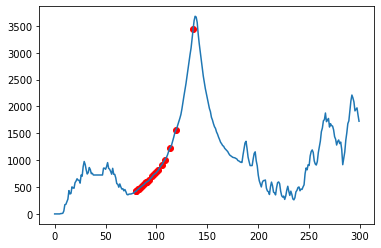

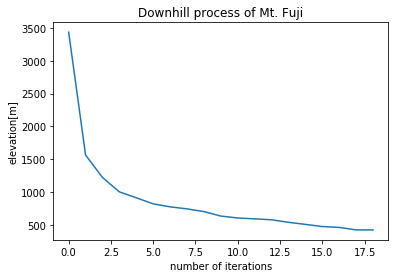

In [94]:
"""
【問題5】問題4における下山過程をMatplotlibを使いグラフで可視化してください。
　断面図の中に移動した地点を点で表示する
　繰り返し毎の標高や勾配を折れ線グラフにする
"""

plt.plot(fuji[:,0], fuji[:,3])
plt.scatter(step_for_going_down,fuji[step_for_going_down,3],color ="red")
plt.show()

plt.title('Downhill process of Mt. Fuji')
plt.ylabel('elevation[m]')
plt.xlabel('number of iterations')
plt.plot(fuji[step_for_going_down,3])
plt.show()


In [95]:
"""
【問題6】初期値の変更
問題4では最初の「今いる地点」を136と固定しましたが、
これを他の全ての点で計算してください。
具体的には、「今いる地点」を変更できるようにするということです"""

descended_lists = []
for i, start_position in enumerate(range(1, 300)):
    descended_lists.append(going_down(next_place_from_here, place_right_now,number_of_place=start_position,alpha=0.2))
print("作成したリストの種類：{}".format(len(descended_lists))) #299通り計算できたことを確認

作成したリストの種類：299


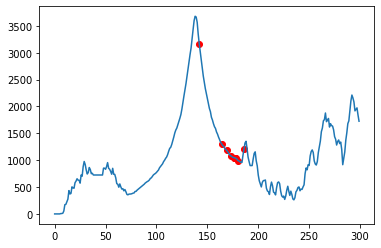

In [96]:
"""【問題7】初期値ごとの下山過程の可視化
例えば136と142では富士山の異なる斜面を下ることになります。"""

step_for_going_down = going_down(next_place_from_here, place_right_now, number_of_place=142)
plt.plot(fuji[:,0], fuji[:,3])
plt.scatter(step_for_going_down,fuji[step_for_going_down,3],color ="red")
plt.show()


[136, 135, 134, 133, 132, 131, 130, 129, 128, 127, 126, 125, 124, 124]


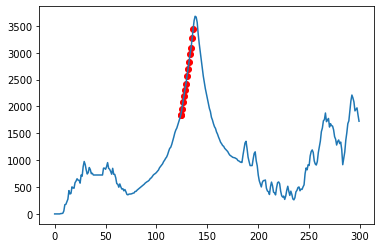

In [107]:
"""【問題8】（アドバンス問題）ハイパーパラメータの変更
ハイパーパラメータ $\alpha$ を変化させるとどのような下山過程となるか、
問題5のように可視化してください。そして、ハイパーパラメータにより結果が大きく異なることを確認してください。

0.01, 0.05, 0.1, 0.5, 1
"""

step_for_going_down = going_down(next_place_from_here, place_right_now, number_of_place=136, alpha=0.005)
print(step_for_going_down)

plt.plot(fuji[:,0], fuji[:,3])
plt.scatter(step_for_going_down,fuji[step_for_going_down,3],color ="red")
plt.show()


[136, 134, 133, 132, 131, 130, 129, 128, 127, 126, 125, 124, 123, 122, 121, 120, 120]


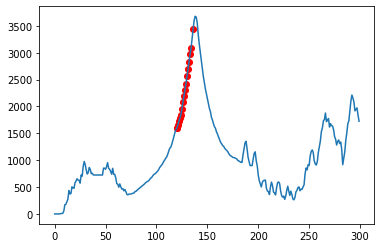

In [108]:

step_for_going_down = going_down(next_place_from_here, place_right_now, number_of_place=136, alpha=0.01)
print(step_for_going_down)

plt.plot(fuji[:,0], fuji[:,3])
plt.scatter(step_for_going_down,fuji[step_for_going_down,3],color ="red")
plt.show()



[136, 128, 122, 119, 116, 113, 110, 109, 107, 105, 104, 103, 101, 100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 80]


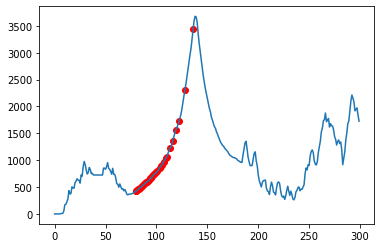

In [102]:

step_for_going_down = going_down(next_place_from_here, place_right_now, number_of_place=136, alpha=0.05)
print(step_for_going_down)

plt.plot(fuji[:,0], fuji[:,3])
plt.scatter(step_for_going_down,fuji[step_for_going_down,3],color ="red")
plt.show()



[136, 119, 113, 108, 105, 102, 100, 98, 96, 93, 91, 90, 89, 87, 85, 83, 82, 80, 80]


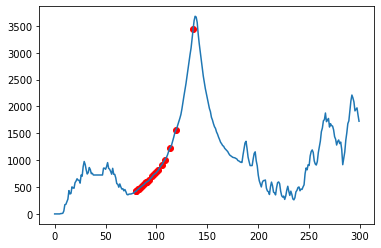

In [103]:

step_for_going_down = going_down(next_place_from_here, place_right_now, number_of_place=136, alpha=0.1)
print(step_for_going_down)

plt.plot(fuji[:,0], fuji[:,3])
plt.scatter(step_for_going_down,fuji[step_for_going_down,3],color ="red")
plt.show()



[136, 52, 15, 46, 46]


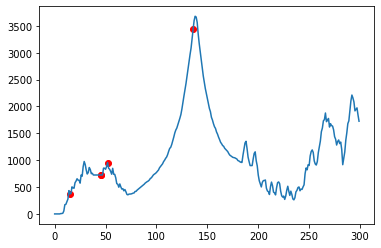

In [104]:

step_for_going_down = going_down(next_place_from_here, place_right_now, number_of_place=136, alpha=0.5)
print(step_for_going_down)

plt.plot(fuji[:,0], fuji[:,3])
plt.scatter(step_for_going_down,fuji[step_for_going_down,3],color ="red")
plt.show()


[136, 1, 1]


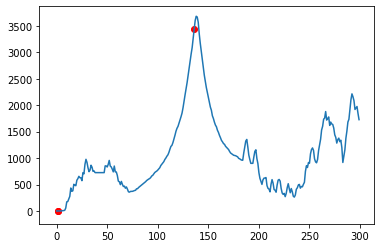

In [105]:


step_for_going_down = going_down(next_place_from_here, place_right_now, number_of_place=136, alpha=1)
print(step_for_going_down)

plt.plot(fuji[:,0], fuji[:,3])
plt.scatter(step_for_going_down,fuji[step_for_going_down,3],color ="red")
plt.show()
